In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../datasets/iris.data', names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [8]:
X = df.iloc[:, [0,1,2,3]].values
y = df.iloc[:,4].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0) # remove the random_state after!!!!

## Logistic Regression

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
classifier = LogisticRegression()

In [13]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [14]:
predictions = classifier.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [16]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


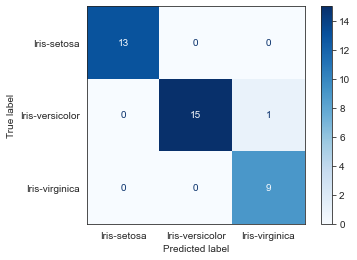

In [17]:
sns.set_style('white')
sklearn.metrics.plot_confusion_matrix(classifier, X_test, y_test, cmap="Blues")

In [18]:
print(classification_report(predictions, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



<AxesSubplot:>

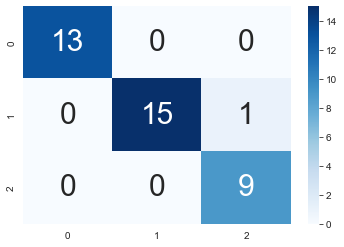

In [19]:
sns.heatmap(cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues")

## KNN

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.88      1.00      0.93        14
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.95        38
      macro avg       0.96      0.94      0.94        38
   weighted avg       0.95      0.95      0.95        38



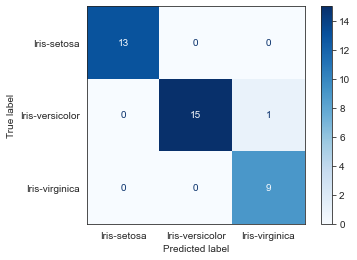

In [20]:
# trying with K=20
cls = KNeighborsClassifier(n_neighbors=20)
cls.fit(X_train, y_train)
prds = cls.predict(X_test)
print(classification_report(prds, y_test))

sns.set_style("white")
sklearn.metrics.plot_confusion_matrix(classifier, X_test, y_test, cmap="Blues")

In [21]:
error_rate = []
for i in range(1,36):
    cls = KNeighborsClassifier(n_neighbors=i)
    cls.fit(X_train, y_train)
    prds = cls.predict(X_test)
    error_rate.append(np.mean(prds != y_test))

Text(0, 0.5, 'Error Rate')

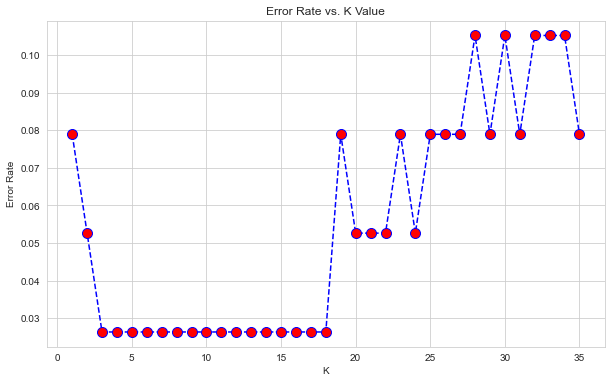

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.plot(range(1,36),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



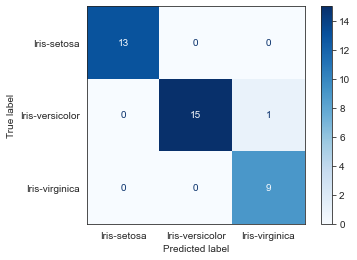

In [23]:
cls = KNeighborsClassifier(n_neighbors=10)
cls.fit(X_train, y_train)
prds = cls.predict(X_test)
print(classification_report(prds, y_test))
sns.set_style("white")
sklearn.metrics.plot_confusion_matrix(classifier, X_test, y_test, cmap="Blues")

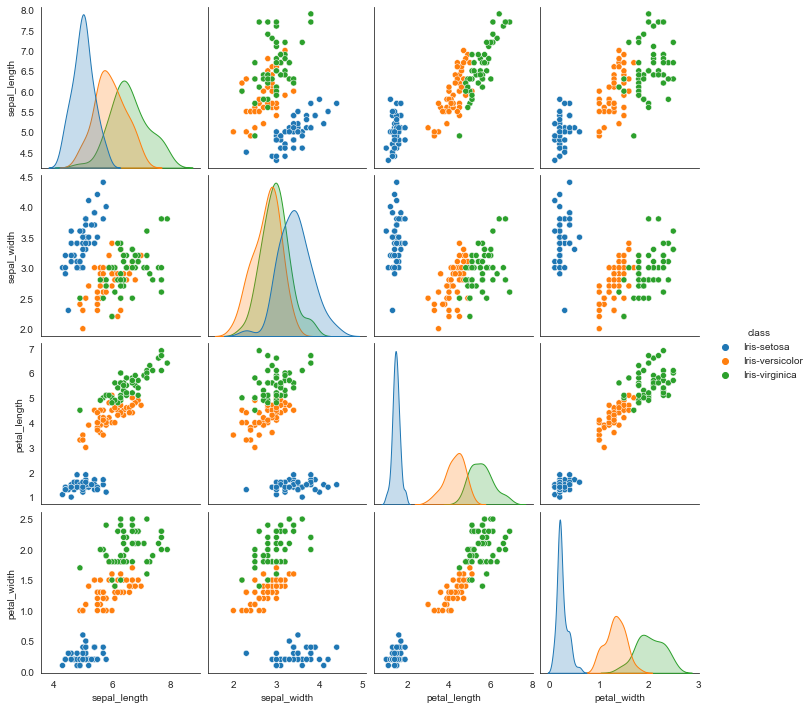

In [24]:
sns.pairplot(df, hue="class")

We notice that virginica is easily identified, but setosa and versicolor have some overlap

In [25]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


We notice that petal_width and petal_length are correlated, let's try to remove one of them and see if this will affect the results.

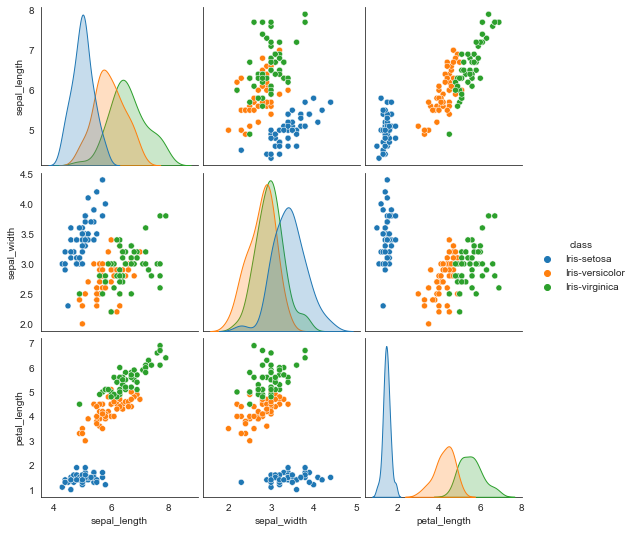

In [26]:
sns.pairplot(df.drop('petal_width', axis=1), hue="class")

In [28]:
X = df.drop(['petal_width', 'class'], axis=1).values
y = df['class'].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
classifier = LogisticRegression()

In [31]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [32]:
predictions = classifier.predict(X_test)

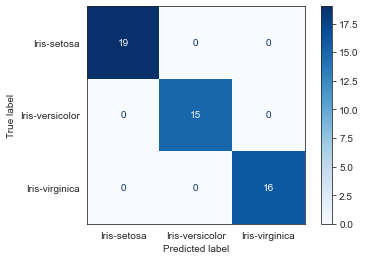

In [33]:
sklearn.metrics.plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues')

In [34]:
print(classification_report(y_test, predictions))
print('Accuracy score:', accuracy_score(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50

Accuracy score: 1.0
